# Neural & Behavioral Modeling - Week 1 (Exercises)
by Chi-Lin Yu (r05227101@ntu.edu.tw; psychilinyu@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from itertools import compress
random.seed(1)  

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex. What types of group result?

### 1.1 Insert your codes to complete the simulation (2 points)

In [2]:
# Model parameters:
Ngroups=10 # 5 # 20
Npeople=100 # 50 # 1000  
Tolerance=.2 # .40 # .50 # .75   # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts,tit,Npeople):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    title(tit)
    ylim(0,Npeople/2)
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

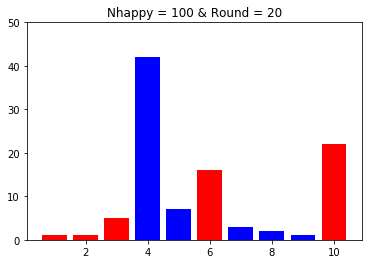

In [3]:
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people

x = 0 # Record while loop
# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    for i in range(Npeople): 
        counts, proportions = party_stats(people)
        fil0 = list(proportions[:,0] > Tolerance)
        fil1 = list(proportions[:,1] > Tolerance)
        if people[i].sex == 1:
            if people[i].group in list(compress(list(range(Ngroups)), fil0)):
                people[i].leave()
            else:
                Nhappy=Nhappy+1
        if people[i].sex == 0:
            if people[i].group in list(compress(list(range(Ngroups)), fil1)):
                people[i].leave()
            else:
                Nhappy=Nhappy+1
        # Plot new results:
        counts, proportions=party_stats(people) # size=group*sex
        plot_party(counts,'Nhappy = '+str(Nhappy)+' & Round = '+str(x),Npeople)
    x = x + 1

### 1.2 Modify the three model parameters & discuss how each affects convergence of the simulation (2 points)

If Ngroup becomes small and Npeople becomes large, it takes more time to converge.

Lower toloerance will also take more times to converge.

The lower the tolerance, the more move have to be made (it takes really long times to make tolerance 0.2 converge).

If the tolerance is really low (i.e, 0.01), the result might not converge.

However, when the tolerance is bigger than 0.5, it will probably not lead to group polarization.

For example, if tolerance is 0.8, every one is happy in a group composing 70 men and 30 women. 

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

The tolerance is the major factor that leads to group polarization.

If the tolerance is lower than 0.5, it must lead to group polarization.

In a group consisting of women and men that are both more than the tolerance (e.g.,, 0.25, e.g, men = 7, women = 3), both will leave.

In a group consisting of only men that are more than the tolerance (0.25; e.g, men = 8, women = 2), women will leave but men will not leave, thereby leading to group polarization.

Furthermore, the lower the tolerance, the more move have to be made. 

In lowe tolerance cases, either man or women (sex = 0 or sex = 1) will tend to leave the group even when there are much more same-sex people in the group.

For example, in a situation of Tolerance=.1, even man and women will both want to leave even in a group of men = 8 and women = 2, a somehow polarized case.

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

Write your answer here with [LaTex](https://www.sharelatex.com/learn/Mathematical_expressions) formula

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.